In [1]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
import networkx as nx
import scipy
import matplotlib.pyplot as plt

In [2]:
!python -m spacy download en_core_web_sm

     --------------------------------------- 12.8/12.8 MB 25.2 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
#IF USING A VIRTUAL ENVIRONMENT, THE DOWNLOAD WILL BE THERE!!!
#English Language Model
ELM = spacy.load(r'C:\Users\Baljo\OneDrive\Desktop\DS\GOT-Project\GOT\Lib\site-packages\en_core_web_sm\en_core_web_sm-3.4.1')

## LOAD BOOKS

In [4]:
import os

#Books in directory
all_books = [b for b in os.scandir('BookData') if '.txt' in b.name]

#Doing book 1 for practice (A Game of Thrones)
book1_P1 = all_books[4]
book1_P2 = all_books[5]


## Visualize

In [5]:
book1P1_txt = open(book1_P1, encoding='utf-8').read()
book1P1_doc = ELM(book1P1_txt)

book1P2_txt = open(book1_P2, encoding='utf-8').read()
book1P2_doc = ELM(book1P2_txt)

#displacy.render(book1P1_doc[0:100], style="ent", jupyter=True)

In [6]:
Book1_characters = pd.read_csv('Book1.csv')
Book1_characters["First Name"] = Book1_characters["FIRST_LAST"].apply(lambda x: x.split(' ', 1)[0])

In [7]:
Book1_characters

,FIRST_LAST,First Name
0,Tyrion Lannister,Tyrion
1,Jon Snow,Jon
2,Arya Stark,Arya
3,Daenerys Targaryen,Daenerys
4,Catelyn Stark,Catelyn
5,Sansa Stark,Sansa
6,Bran Stark,Bran
7,Jaime Lannister,Jaime
8,Eddard Stark,Eddard
9,Theon Greyjoy,Theon


In [8]:
sent_entity_df = []

for sent in book1P1_doc.sents:
    entity_list = [ent.text for ent in sent.ents]
    sent_entity_df.append({"Sentence": sent, "Entity":entity_list})

    
for sent in book1P2_doc.sents:
    entity_list1 = [ent.text for ent in sent.ents]
    sent_entity_df.append({"Sentence": sent, "Entity":entity_list1})
    
    
sent_entity_df = pd.DataFrame(sent_entity_df)

In [9]:
#Contains a table of sentences and the entities contained inside of them
sent_entity_df

,Sentence,Entity
0,"(BRAN, \n\n, The, morning, had, dawned, clear,...",[the end of summer]
1,"(They, set, forth, at, daybreak, to, see, a, m...","[twenty, Bran]"
2,"(This, was, the, first, time, he, had, been, d...",[first]
3,"(It, was, the, ninth, year, of, summer, ,, and...","[the ninth year of summer, seventh, Bran’s]"
4,"(The, man, had, been, taken, outside, a, small...",[]
...,...,...
21816,"(“, Blood, of, my, blood, ,, ”, she, heard, Ag...",[]
21817,"(“, Blood, of, my, blood, ,, ”, Rakharo, shout...",[]
21818,"(And, after, them, came, her, handmaids, ,, an...","[Dothraki, Dany, today, tomorrow, Drogo]"
21819,"(As, Daenerys, Targaryen, rose, to, her, feet,...",[Daenerys Targaryen]


In [10]:
#Filter table to only contain characters
def filter_entity(ent_list, character_df):
    return [ent for ent in ent_list if ent in list(character_df["FIRST_LAST"])
                                                   or ent in list(character_df["First Name"])]

In [11]:
#Remove those that do not contain a character within our csv file
sent_entity_df['character_ent'] = sent_entity_df['Entity'].apply(lambda x: filter_entity(x, Book1_characters))
#Remove empty lists
sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_ent'].map(len) > 0]
sent_entity_df_filtered.head(10)

,Sentence,Entity,character_ent
1,"(They, set, forth, at, daybreak, to, see, a, m...","[twenty, Bran]",[Bran]
14,"(Robb, and, Jon, sat, tall, and, still, on, th...","[Jon, Bran]","[Jon, Bran]"
21,"(He, had, taken, off, Father, ’s, face, ,, Bra...","[Bran, Stark, Winterfell]",[Bran]
22,"(There, were, questions, asked, and, answers, ...","[morning, Bran]",[Bran]
25,"(Lord, Eddard, Stark, dismounted, and, his, wa...","[Eddard Stark, Theon Greyjoy]","[Eddard Stark, Theon Greyjoy]"
33,"(Bran, ’s, bastard, brother, Jon, Snow, moved,...",[Jon Snow],[Jon Snow]
45,"(He, laughed, ,, put, his, boot, on, the, head...","[Jon, Greyjoy]",[Jon]
46,"(He, put, a, hand, on, Bran, ’s, shoulder, ,, ...","[Bran’s, Bran]",[Bran]
47,"(“, You, did, well, ,, ”, Jon, told, him, sole...",[Jon],[Jon]
53,"(“, He, had, courage, ,, at, the, least, ., ”,...",[Jon Snow],[Jon Snow]


In [12]:
#Delete the last name and keep to first to remove any duplicates of the same character
sent_entity_df_filtered['character_ent'] = sent_entity_df_filtered['character_ent'].apply(lambda x: [item.split(' ')[0] for item in x])

C:\Users\Baljo\AppData\Local\Temp/ipykernel_9244/308629669.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_ent'] = sent_entity_df_filtered['character_ent'].apply(lambda x: [item.split(' ')[0] for item in x])


In [13]:
sent_entity_df_filtered.head(10)

,Sentence,Entity,character_ent
1,"(They, set, forth, at, daybreak, to, see, a, m...","[twenty, Bran]",[Bran]
14,"(Robb, and, Jon, sat, tall, and, still, on, th...","[Jon, Bran]","[Jon, Bran]"
21,"(He, had, taken, off, Father, ’s, face, ,, Bra...","[Bran, Stark, Winterfell]",[Bran]
22,"(There, were, questions, asked, and, answers, ...","[morning, Bran]",[Bran]
25,"(Lord, Eddard, Stark, dismounted, and, his, wa...","[Eddard Stark, Theon Greyjoy]","[Eddard, Theon]"
33,"(Bran, ’s, bastard, brother, Jon, Snow, moved,...",[Jon Snow],[Jon]
45,"(He, laughed, ,, put, his, boot, on, the, head...","[Jon, Greyjoy]",[Jon]
46,"(He, put, a, hand, on, Bran, ’s, shoulder, ,, ...","[Bran’s, Bran]",[Bran]
47,"(“, You, did, well, ,, ”, Jon, told, him, sole...",[Jon],[Jon]
53,"(“, He, had, courage, ,, at, the, least, ., ”,...",[Jon Snow],[Jon]


## Relationship Method

In [14]:
window_size = 5
relationships = []

for i in range(sent_entity_df_filtered.index[-1]):
    end_i = min(i + 5, sent_entity_df_filtered.index[-1])
    char_list = sum((sent_entity_df_filtered.loc[i: end_i].character_ent), [])
    #remove names that appear twice in a list
    char_uniq = [char_list[i] for i in range(len(char_list)) if (i==0) or char_list[i] != char_list[i-1]]
    
    if len(char_uniq) > 1:
        for idx, a in enumerate(char_uniq[:-1]):
            b = char_uniq[idx + 1]
            relationships.append({"Source": a, "target": b})

In [15]:
relationship_df = pd.DataFrame(relationships)

In [16]:
relationship_df

,Source,target
0,Jon,Bran
1,Jon,Bran
2,Jon,Bran
3,Jon,Bran
4,Jon,Bran
...,...,...
2332,Cersei,Catelyn
2333,Cersei,Catelyn
2334,Cersei,Catelyn
2335,Cersei,Catelyn


## Aggregate Columns

In [17]:
relationship_df = pd.DataFrame(np.sort(relationship_df.values, axis = 1), columns = relationship_df.columns)
relationship_df

,Source,target
0,Bran,Jon
1,Bran,Jon
2,Bran,Jon
3,Bran,Jon
4,Bran,Jon
...,...,...
2332,Catelyn,Cersei
2333,Catelyn,Cersei
2334,Catelyn,Cersei
2335,Catelyn,Cersei


In [18]:
relationship_df["value"] = 1
relationship_df = relationship_df.groupby(["Source","target"], sort=False, as_index=False).sum()

In [19]:
#Table containing relationship and the frequency of this relationship
relationship_df

,Source,target,value
0,Bran,Jon,142
1,Bran,Eddard,3
2,Eddard,Theon,12
3,Jon,Theon,27
4,Bran,Theon,56
...,...,...,...
89,Sansa,Stannis,3
90,Margaery,Tywin,3
91,Jaime,Roose,5
92,Roose,Stannis,1


## Visualization

In [20]:
Graph = nx.from_pandas_edgelist(relationship_df, source = "Source", target="target", edge_attr = "value", create_using = nx.Graph())

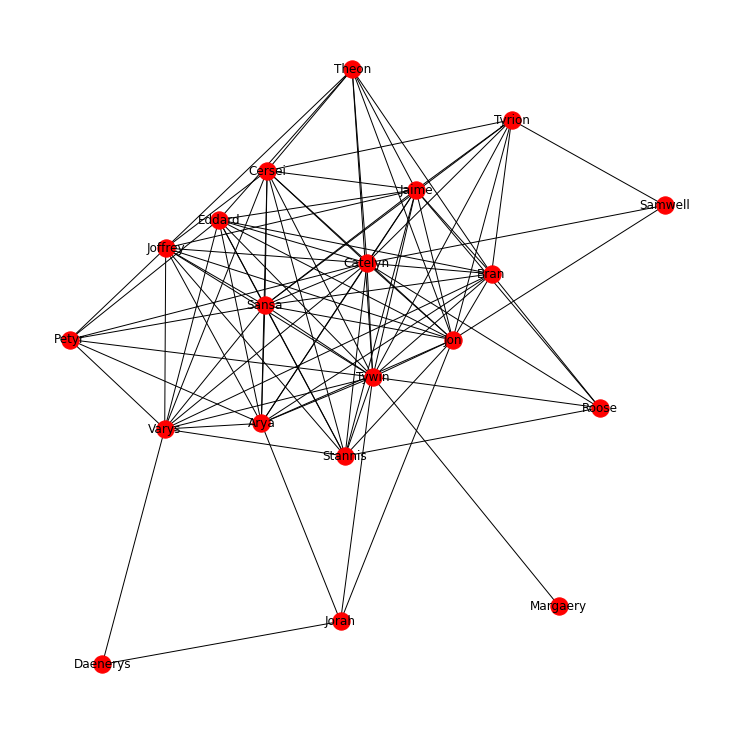

In [21]:
#If there is an issue with scipy this is the solution:
#import sys
#!sys.executable -m pip install scipy
plt.figure(figsize=(10,10))
pos = nx.kamada_kawai_layout(Graph)
nx.draw(Graph, with_labels=True, node_color='red', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [22]:
from pyvis.network import Network
net = Network(notebook = True, width="1000px", height="700px", bgcolor="#222222", font_color="white")
#degree is the number of connections a node has
node_degree = dict(Graph.degree) 

#size of nodes based on node_degree
nx.set_node_attributes(Graph, node_degree, 'size')

net.from_nx(Graph)
net.show("GOT.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [23]:
dict(Graph.degree)

{'Bran': 11,
 'Jon': 14,
 'Eddard': 11,
 'Theon': 8,
 'Catelyn': 16,
 'Cersei': 11,
 'Tywin': 17,
 'Joffrey': 11,
 'Jaime': 13,
 'Tyrion': 8,
 'Arya': 12,
 'Sansa': 13,
 'Stannis': 10,
 'Daenerys': 2,
 'Jorah': 4,
 'Petyr': 7,
 'Varys': 11,
 'Samwell': 3,
 'Roose': 5,
 'Margaery': 1}

## Character Importance

In [24]:
degree_dict = nx.degree_centrality(Graph)
degree_dict

{'Bran': 0.5789473684210527,
 'Jon': 0.7368421052631579,
 'Eddard': 0.5789473684210527,
 'Theon': 0.42105263157894735,
 'Catelyn': 0.8421052631578947,
 'Cersei': 0.5789473684210527,
 'Tywin': 0.894736842105263,
 'Joffrey': 0.5789473684210527,
 'Jaime': 0.6842105263157894,
 'Tyrion': 0.42105263157894735,
 'Arya': 0.631578947368421,
 'Sansa': 0.6842105263157894,
 'Stannis': 0.5263157894736842,
 'Daenerys': 0.10526315789473684,
 'Jorah': 0.21052631578947367,
 'Petyr': 0.3684210526315789,
 'Varys': 0.5789473684210527,
 'Samwell': 0.15789473684210525,
 'Roose': 0.2631578947368421,
 'Margaery': 0.05263157894736842}

<AxesSubplot:>

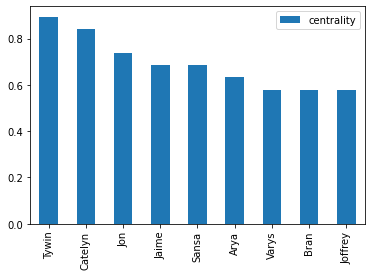

In [28]:
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<AxesSubplot:>

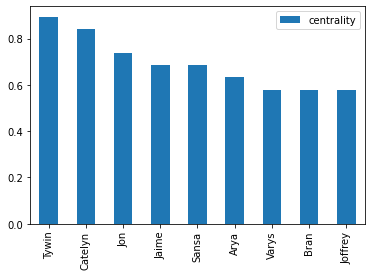

In [29]:
betweenness_dict = nx.betweenness_centrality(Graph)
betweenness_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
betweenness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<AxesSubplot:>

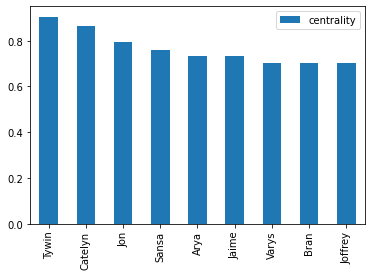

In [30]:
closeness_dict = nx.closeness_centrality(Graph)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality'])
closeness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

In [31]:
nx.set_node_attributes(Graph, degree_dict, 'degree_centrality')
nx.set_node_attributes(Graph, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(Graph, closeness_dict, 'closeness_centrality')

In [34]:
import community as community_louvain

In [35]:
communities = community_louvain.best_partition(Graph)
communities

{'Bran': 2,
 'Jon': 1,
 'Eddard': 2,
 'Theon': 2,
 'Catelyn': 1,
 'Cersei': 1,
 'Tywin': 2,
 'Joffrey': 0,
 'Jaime': 2,
 'Tyrion': 1,
 'Arya': 0,
 'Sansa': 0,
 'Stannis': 2,
 'Daenerys': 0,
 'Jorah': 0,
 'Petyr': 0,
 'Varys': 0,
 'Samwell': 1,
 'Roose': 2,
 'Margaery': 2}

In [36]:
nx.set_node_attributes(Graph, communities, 'group')

In [47]:
community_network = Network(notebook = True, width="1000px", height="700px", bgcolor="#222222", font_color='white')
community_network.from_nx(Graph)
community_network.show("GOT_Communities.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 
